In [1]:
# Analyse et manipulation des données
import pandas as pd
import numpy as np
import os 
import random
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from GazeExtractViz import extract_fixations_byfile
extract_fixations_byfile(maxD= 75, minT=50,
                         datapath='./data/raw_data_5mins',
                         datafile= 'P01_BROWSE.csv')

participant set activity  time_start  time_end  fixaTime  Nbpt  x_centre   
0           P01   B   BROWSE           0      1037      1037    31       715  \
1           P01   B   BROWSE        1956      2141       185     7      1062   
2           P01   B   BROWSE        2202      2505       303    11      1354   
3           P01   B   BROWSE        4338      4533       195     7       589   
4           P01   B   BROWSE        4899      5254       355     9      1640   
..          ...  ..      ...         ...       ...       ...   ...       ...   
763         P01   B   BROWSE      298193    298845       652    22       242   
764         P01   B   BROWSE      298875    299063       188     7       298   
765         P01   B   BROWSE      299093    299301       208     8       290   
766         P01   B   BROWSE      299330    299423        93     4       290   
767         P01   B   BROWSE      299452    299731       279    10       518   

     y_centre  
0         939  
1         283  
2         507  
3        1067  
4          68  
..        ...  
763       158  
764       128  
765       153  
766       186  
767       359  

[768 rows x 9 columns]

In [3]:
from GazeExtractViz import Extract_FixaSacca_ofAllfiles

gazeData_D75T50 = Extract_FixaSacca_ofAllfiles(maxD= 75, minT=50,
                                              path='./data/raw_data_5mins').dropna() 
gazeData_D75T50

d:\DataScience\2_DataEnPratique\ML_eyetracking\GazeExtractViz.py:111: RuntimeWarning: invalid value encountered in scalar divide
  cos_Abs = np.dot([vectorX,vectorY],[1,0]) / Amlplitude
d:\DataScience\2_DataEnPratique\ML_eyetracking\GazeExtractViz.py:111: RuntimeWarning: invalid value encountered in scalar divide
  cos_Abs = np.dot([vectorX,vectorY],[1,0]) / Amlplitude


participant set activity  time_start  time_end  fixaTime  Nbpt  x_centre   
0           P01   B   BROWSE           0      1037      1037    31       715  \
1           P01   B   BROWSE        1956      2141       185     7      1062   
2           P01   B   BROWSE        2202      2505       303    11      1354   
3           P01   B   BROWSE        4338      4533       195     7       589   
4           P01   B   BROWSE        4899      5254       355     9      1640   
..          ...  ..      ...         ...       ...       ...   ...       ...   
226         P24   B    WRITE      289115    289220       105     2         0   
227         P24   B    WRITE      292414    292575       161     3       135   
228         P24   B    WRITE      292614    292687        73     2        48   
229         P24   B    WRITE      292777    293103       326     6         7   
230         P24   B    WRITE      294721    298957      4236     3       191   

     y_centre saccTime   Amlplitude vectorX vectorY angleAbs180 angleAbs360   
0         939      919   742.121958     347    -656   62.122798  297.877202  \
1         283       61   368.021738     292     224   37.492653   37.492653   
2         507     1833   948.063816    -765     560  143.794897  143.794897   
3        1067      366  1450.035172    1051    -999   43.546955  316.453045   
4          68      227    65.115282     -12      64  100.619655  100.619655   
..        ...      ...          ...     ...     ...         ...         ...   
226       592     3194   180.623919     135    -120   41.633539  318.366461   
227       472       39    157.25775     -87     131  123.589017  123.589017   
228       603       90   128.705089     -41     122  108.575724  108.575724   
229       725     1618   227.622494     184    -134   36.064386  323.935614   
230       591       81   182.332115    -181      22  173.069867  173.069867   

    angleRela180  
0      62.122798  
1      99.615451  
2     106.302244  
3     172.658148  
4     144.166611  
..           ...  
226   144.126094  
227   165.222556  
228    15.013292  
229   144.640111  
230   150.865747  

[98012 rows x 16 columns]

In [4]:
gazeData_D75T50.to_csv('./data/Extracted_GazeData_FixationSaccades.csv',index=False)

In [5]:
print(gazeData_D75T50.shape[0])
print(gazeData_D75T50.copy().dropna().shape[0])

98012
98012


In [6]:
from GazeExtractViz import Viz_FixaSacc_compare8actis, VizCompare_1activity_btwn3person

d:\DataScience\2_DataEnPratique\ML_eyetracking\GazeExtractViz.py:275: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


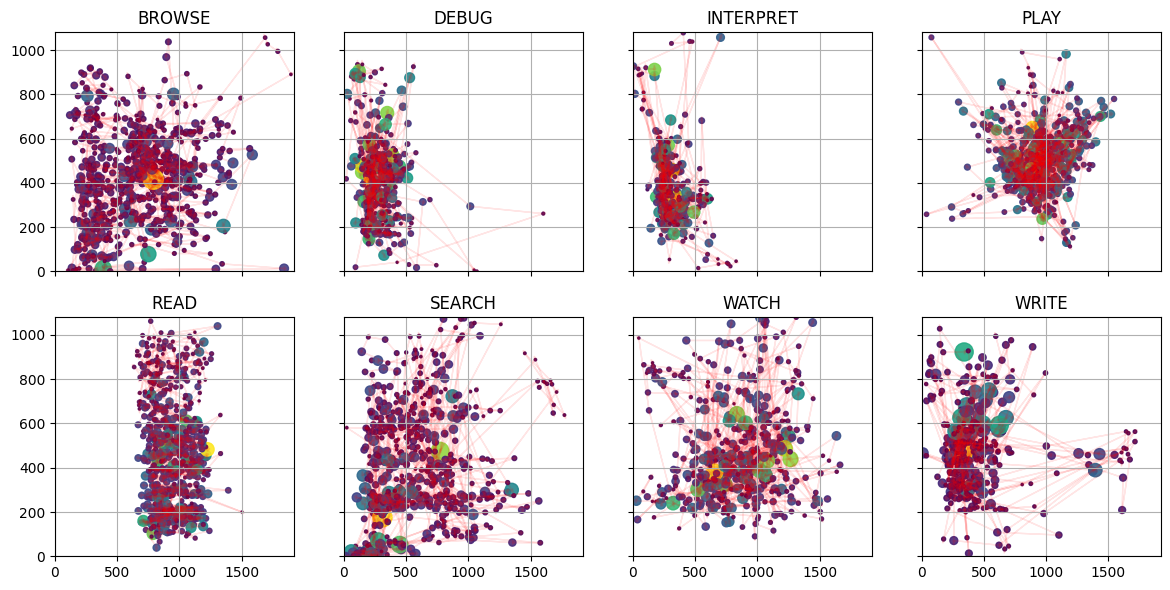

In [7]:
Viz_FixaSacc_compare8actis(gazedata= gazeData_D75T50)


d:\DataScience\2_DataEnPratique\ML_eyetracking\GazeExtractViz.py:235: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


presse the button again to refresh and choose anothers 3 participant


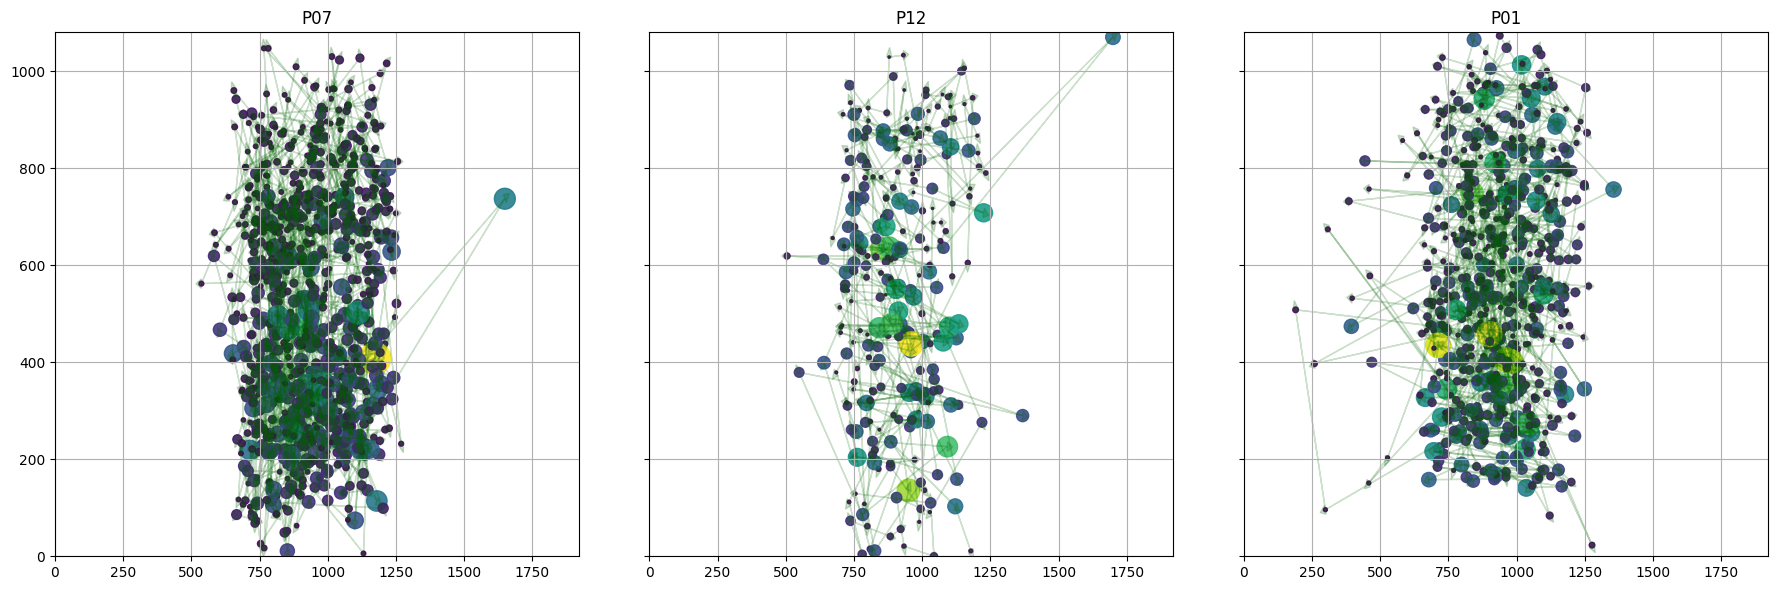

In [8]:
VizCompare_1activity_btwn3person(activity= 'READ',
                                 data= gazeData_D75T50)

### Features Reaserch

#### Dataset of basic Feathures of experience by activity and participant

**Objective:** based on the above dateset 'allFixAndSaccades' which contains all infos of fixation and saccads on gaze level, we need to synthesizer various features/variables on the level of experiement. It is sort of aggregating the these data by "activity" and "participant", so that the result data can be proceded to Machine Learning modeling.

In [9]:
###: Objective 
## Function to sythesize basic Features
def synthesize_basicFeatures(dataFrame, 
                            var_SmallAmpl,
                            var_BigAmpl,
                            var_AngH,
                            var_AngV,
                            var_ReflSmall,
                            var_ReflBig) :
    """synthesize basic features/variables from extracted dataframe,
    and aggrated on the level of experiement by activity and participant
    
    input: dataframe of extracted dataset of fixation and saccades
    parametres : ...
    return: a dataframe for ML"""
    import numpy as np
    ## Boucle to extract features by participant and activity
    participantList = list(dataFrame['participant'].unique())
    activitiesList = list(dataFrame['activity'].unique())
    ## Definition of columns names and order 
    features_names=['meanFixaTm','convexhull','fixaDensity','X_cgT','Y_cgT',
                    'SmallAmpl','BigAmpl','Horizontal_Sacc','Vertical_Sacc','smallReflect','bigReflect'] 
    keycolumn_Names = ['participant','activity','set']

    ## iniation: arrays to contain Features and keys to sythesized
    features_array = np.empty((0,len(features_names)), dtype='float32')
    key_matric = []
    for part in participantList :
        for acti in activitiesList : 
            ## data query from the dataset
            df = dataFrame[ (dataFrame['participant'] == part) & (dataFrame['activity'] == acti) ]

            ## for each experience, label the keys and add to the key matrice
            key_matric.append([ part, acti, df['set'].unique()[0] ])

            ## for each experience, create one line and fulfill with the concerning values 
            features_line = np.empty((1,len(features_names)), dtype='float32')
            features_line[0,0] = df['fixaTime'].mean() # meanFixaTm
            features_line[0,1] = ConvexHull_perimeter(arrayPoints=df[['x_centre', 'y_centre']].values) / (1080+1920)*2   # convexhull
            features_line[0,2] = np.sum(df['fixaTime']) / 300000  # fixaDensity
            features_line[0,3] = np.sum(df['x_centre'] * df['fixaTime']) / np.sum(df['fixaTime'])  # X_cgT centre gravity
            features_line[0,4] = np.sum(df['y_centre'] * df['fixaTime']) / np.sum(df['fixaTime'])  # Y_cgT centre gravity
            # masks / boulean 
            Horizontal_Sacc = (df['angleAbs180'] < var_AngH) | (df['angleAbs180'] > (180 - var_AngH))
            Vertical_Sacc = (df['angleAbs180'] < (90 + var_AngV)) & (df['angleAbs180'] > (90 - var_AngV))
            smallReflect = (df['angleRela180'] < var_ReflSmall) & (df['angleRela180'] > var_AngH)
            bigReflect = (df['angleRela180'] > var_ReflBig) & (df['angleRela180'] < (180 - var_AngH))
            # caculate using boulean
            features_line[0,5] = len(df[(df['Amlplitude'] < var_SmallAmpl)]) / len(df) # SmallAmpl
            features_line[0,6] = len(df[(df['Amlplitude'] > var_BigAmpl)]) / len(df)  # BigAmpl
            features_line[0,7] = len(df[Horizontal_Sacc]) / len(df)  # Horizontal_Sacc
            features_line[0,8] = len(df[Vertical_Sacc]) / len(df)  # Vertical_Sacc  
            features_line[0,9] = len(df[(smallReflect)]) / len(df)  # smallReflect 
            features_line[0,10] = len(df[(bigReflect)]) / len(df)  #  bigReflect
            # plus ...TODO
            # add the line current to feature array
            features_array = np.concatenate((features_array,features_line),axis=0)
            
    # Concatanation of features array and keys, and transforme in dataframe      
    arrayConcat = np.concatenate((np.array(key_matric), features_array),axis=1) # combine the columnes
    df_output = pd.DataFrame(data= arrayConcat, columns= keycolumn_Names + features_names)

    return df_output  

def ConvexHull_perimeter(arrayPoints) :
    """Caculate the convex hull boundary perimeter for one fixation;  
    arrayPoints = data[['x_centre', 'y_centre']].values """
    from scipy.spatial import ConvexHull
    # Extraire les points (x, y)
    #points = data[['x_centre', 'y_centre']].values  # Convertir en tableau NumPy
    # Calculer l'enveloppe convexe
    hull = ConvexHull(arrayPoints)
    # Récupérer les sommets de l'enveloppe convexe
    hull_vertices = hull.vertices
    # Calculer la longueur (périmètre) de l'enveloppe convexe
    perimeter = 0
    for i in range(len(hull_vertices)):
        p1 = arrayPoints[hull_vertices[i]]
        p2 = arrayPoints[hull_vertices[(i + 1) % len(hull_vertices)]]  # Retour au premier sommet
        perimeter += np.linalg.norm(p1 - p2)  # Distance Euclidienne
    #print(f"Périmètre de l'enveloppe convexe : {perimeter}")
    return perimeter.astype('float32')


##

In [10]:
# dataExtracted = pd.read_csv('.\data\Extracted_GazeData_FixationSaccades.csv')
# dataExtracted.tail()

In [11]:

dfFeatures01 = synthesize_basicFeatures(
                            dataFrame = gazeData_D75T50, 
                            var_SmallAmpl= 150,
                            var_BigAmpl= 500,
                            var_AngH= 5,
                            var_AngV= 5,
                            var_ReflSmall= 60,
                            var_ReflBig= 120
                            )

dfFeatures01

participant   activity set meanFixaTm convexhull fixaDensity      X_cgT   
0           P01     BROWSE   B  274.95306  2.9698403  0.70296335   785.9344  \
1           P01      DEBUG   B  516.79297   3.225101   0.8320367   396.7167   
2           P01  INTERPRET   B   623.9897  2.8367953   0.8070267   327.3159   
3           P01       PLAY   B  657.14813  3.1335251   0.8280067   905.3135   
4           P01       READ   B   306.1279  2.4544716  0.66225666   929.6238   
..          ...        ...  ..        ...        ...         ...        ...   
187         P24       PLAY   B   758.7029  2.7708802  0.88515335  824.98456   
188         P24       READ   B  324.42783   2.096556  0.83918667   953.4768   
189         P24     SEARCH   B  316.15225  3.5515625  0.65759665  569.98834   
190         P24      WATCH   B   377.8382  3.2951288     1.12092   841.2622   
191         P24      WRITE   B    521.026  2.2682586     0.40119  361.91626   

         Y_cgT   SmallAmpl      BigAmpl Horizontal_Sacc Vertical_Sacc   
0     370.7838  0.47066492   0.05345502      0.18774445   0.035202086  \
1     543.4595  0.48447204  0.049689442      0.15113872    0.05383023   
2    484.87442   0.5025773   0.05154639     0.064432986   0.085051544   
3    383.43915  0.36243385  0.076719575      0.11375661   0.034391534   
4    531.21924   0.4807396    0.0431433      0.16949153   0.029275808   
..         ...         ...          ...             ...           ...   
187  425.49792   0.5057143  0.057142857      0.13714285   0.037142858   
188   568.2351   0.6159794  0.016752576      0.22293815   0.024484536   
189  480.29626  0.46474358  0.052884616       0.1474359   0.043269232   
190    544.804  0.31910113   0.10674157      0.08764045    0.03820225   
191  340.18744   0.4025974   0.08225108     0.121212125   0.060606062   

    smallReflect  bigReflect  
0      0.2946545  0.36766624  
1     0.24016564   0.3768116  
2     0.18814433  0.44329897  
3     0.18783069  0.45767197  
4     0.21879815  0.38058552  
..           ...         ...  
187   0.22571428        0.44  
188   0.26417527   0.3775773  
189   0.27403846  0.39102563  
190    0.2977528  0.37865168  
191    0.2034632  0.45021644  

[192 rows x 14 columns]

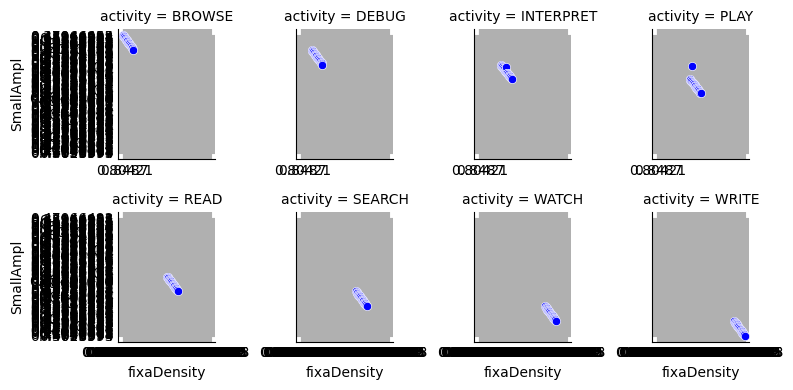

In [174]:
data = dfFeatures01.copy().drop(columns=['set','participant'])
# data['activity'] = np.where(data['activity']== 'WATCH', 1, 0)
#sns.scatterplot(data=data, x="convexhull", y="SmallAmpl", hue="activity")
g = sns.FacetGrid(data, col="activity", col_wrap=4, height=2)
g.map(sns.scatterplot, "fixaDensity", "SmallAmpl", color="blue")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

for activity in list(dfFeatures01['activity'].unique()):
    df_acti = dfFeatures01[dfFeatures01['activity']==activity]
    x = df_acti['fixaDensity']
    y = df_acti['SmallAmpl']
    z = df_acti['convexhull']
    ax.scatter(xs=x, ys=y, zs=z, label=activity)  # this way you can control color/marker/size of each group freely
    #ax.scatter(dfFeatures01[['fixaDensity', 'SmallAmpl', 'convexhull']].T.values, label=activity)  # if you want to do everything in one line, lol

ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()


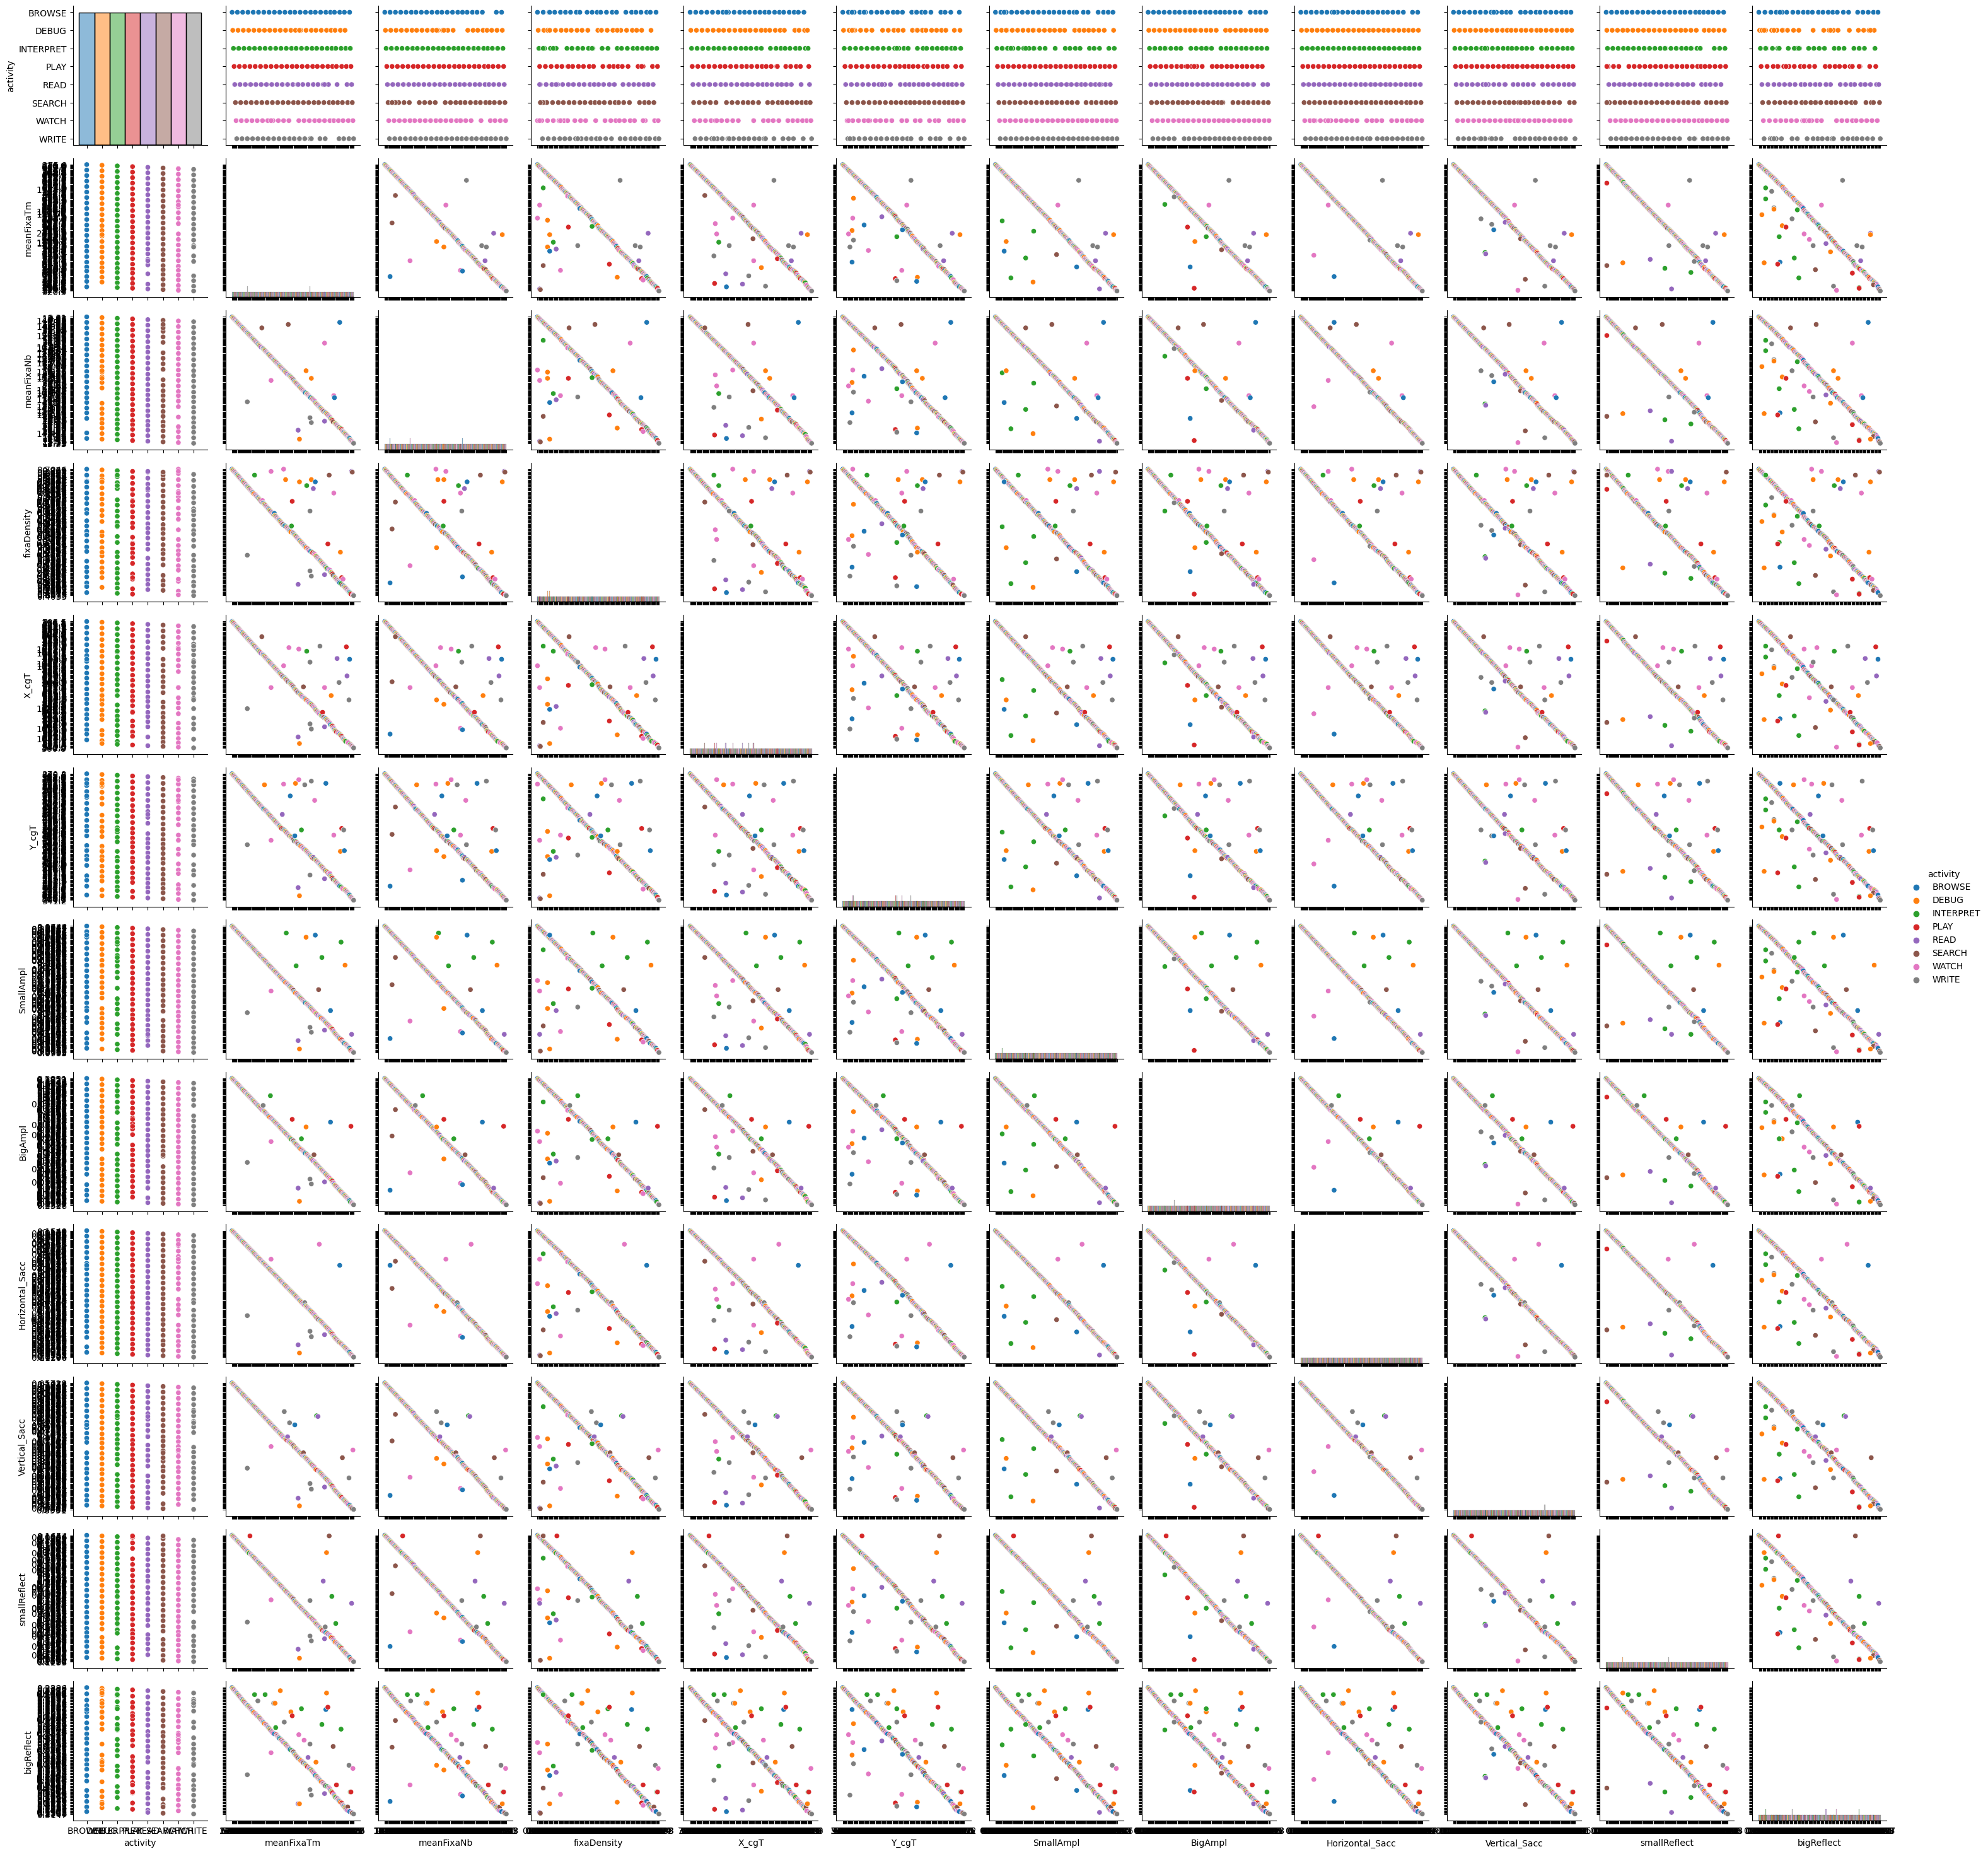

In [35]:
data = dfFeatures01.copy().drop(columns=['set','participant'])

g = sns.PairGrid(data, vars=data.columns, hue="activity")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Remark** : Soit la procédure d'extraction est pas bonne, soit les 'Features' définies sont pas pertinentes

### New Features 

#### Feature creative 01:  `convex hull longeur`


centre point : 349.25,385.75


C:\Users\pengd\AppData\Local\Temp\ipykernel_14480\2265794836.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(points[simplex,0], points[simplex,1], 'k-',c='blue')
C:\Users\pengd\AppData\Local\Temp\ipykernel_14480\2265794836.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(restPoints[simplex,0], restPoints[simplex,1], 'k-',c='darkgreen')


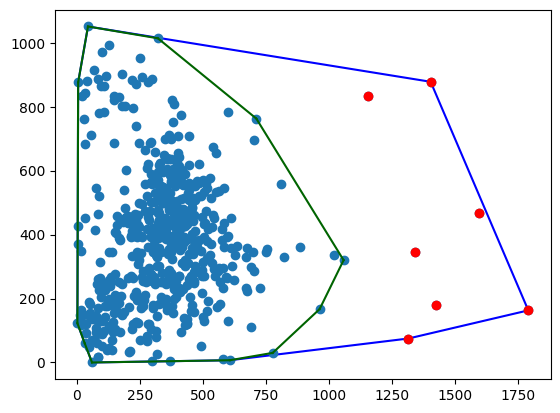

In [62]:
"""Workshop convexHull"""
## Convex Hull perimeter
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from GazeExtractViz import extract_fixations_byfile
## data input
fixation =  extract_fixations_byfile(maxD= 75, minT=50,
                         datapath='./data/raw_data_5mins',
                         datafile= 'P21_DEBUG.csv')

"""Caculate the convex hull boundary perimeter for one fixation"""
## 1. Convex extraction
# Extraire les points (x, y)
points = fixation[['x_centre', 'y_centre']].values  # Convertir en tableau NumPy
# Calculer l'enveloppe convexe
hull = ConvexHull(points)
# Récupérer les sommets de l'enveloppe convexe
hull_vertices = hull.vertices
# Calculer la longueur (périmètre) de l'enveloppe convexe
perimeter = 0
for i in range(len(hull_vertices)):
    p1 = points[hull_vertices[i]]
    p2 = points[hull_vertices[(i + 1) % len(hull_vertices)]]  # Retour au premier sommet
    perimeter += np.linalg.norm(p1 - p2)  # Distance Euclidienne
#print(f"Périmètre de l'enveloppe convexe : {perimeter.astype('float16')}")

## Draw convex hull
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-',c='blue')

## 2. Outliers Detection and seperation 
# Z-score method
centroid = np.mean(points, axis=0)
distances = np.linalg.norm(points - centroid, axis=1)
# >2 are often considered potential outliers (95% confidence for normal distributions).
z_scores = (distances - np.mean(distances)) / np.std(distances)
# Filter
isOutliler_Mask = np.abs(z_scores) > 3
# Exclusion from points 
outliers = points[isOutliler_Mask] 
restPoints = points[~isOutliler_Mask]

#fig, ax = plt.subplot()
# Draw points
plt.plot(points[:,0], points[:,1], 'o')
# Draw outliers
plt.plot(outliers[:,0], outliers[:,1], 'o',c='red')

## Smaller Convex Hull 
new_hull = ConvexHull(restPoints)

for simplex in new_hull.simplices:
    plt.plot(restPoints[simplex,0], restPoints[simplex,1], 'k-',c='darkgreen')

print(f"centre point : {centroid[0].astype('float16')},{centroid[1].astype('float16')}")

**Idea:** 

1. recognize the out standing points, and redo the Convex Hull in ignaring them

In [66]:
## Convex Hull essential
def ConvexHull_outlier_Zscore(pointsArray,Zscore) :
    """ """
    ## original Convex
    hull = ConvexHull(pointsArray)
    # Récupérer les sommets de l'enveloppe convexe
    hull_vertices = hull.vertices
    # Calculate the enveloppe convexe perimeter
    perimeter01 = 0
    for i in range(len(hull_vertices)):
        p1 = points[hull_vertices[i]]
        p2 = points[hull_vertices[(i + 1) % len(hull_vertices)]]  # Retour au premier sommet
        perimeter01 += np.linalg.norm(p1 - p2)  # Distance Euclidienne

    ## 2. Outliers Detection and seperation 
    # Z-score method
    centroid = np.mean(points, axis=0)
    distances = np.linalg.norm(points - centroid, axis=1)
    # >2 are often considered potential outliers (95% confidence for normal distributions).
    z_scores = (distances - np.mean(distances)) / np.std(distances)
    # Filter
    isOutliler_Mask = np.abs(z_scores) > Zscore
    # outliers = pointsArray[isOutliler_Mask] 
    restPoints = pointsArray[~isOutliler_Mask]
    #
    new_centroid = np.mean(restPoints, axis=0)

    ## New Convex enveloppe
    new_hull = ConvexHull(restPoints)
    # get the sommets of enveloppe convexe
    new_hull_vertices = new_hull.vertices
    # Calculate the NEW envelopped convexe perimeter
    perimeter02 = 0
    for i in range(len(new_hull_vertices)):
        p1 = restPoints[new_hull_vertices[i]]
        p2 = restPoints[new_hull_vertices[(i + 1) % len(new_hull_vertices)]]  # Retour au premier sommet
        perimeter02 += np.linalg.norm(p1 - p2)  # Euclidienne distance
    ## Ration between the 2 envelops 
    ratio_perimetre = perimeter02 / perimeter01

    
    return new_centroid[0], new_centroid[1], ratio_perimetre

### Model 

In [103]:
# 
import sklearn
from sklearn import svm
from sklearn import neighbors, metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

def classifieur_Pipeline_taux_dataTrain(dataframe,percentTrain) :

    # Répartition de données 
    msk = np.random.rand(len(dataframe)) <= percentTrain
    train = dataframe[msk]
    test = dataframe[~msk]

    # Equitige de données 
    n_activites = np.array(dataframe['activity'].unique())  # labels
    # Party train
    X_train = train.drop('activity', axis=1)
    Y_train = train["activity"]
    # Party test
    X_test = test.drop('activity', axis=1)
    Y_test = test["activity"]
    ## Instance model
    # svc = sklearn.svm.SVC()
    # svc.fit(X_train, Y_train)

    ## Training Pipeline
    X = np.array(X_train)
    y = np.array(Y_train)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
    clf.fit(X, y)       
                                         
    ## Testing 
    Y_pred = clf.predict(X_test)

    accuracy = sklearn.metrics.accuracy_score(Y_pred, Y_test)
    print("Modèle: sklearn.Pipeline\nRépartition de Donnée: aléatoire par un taux({})\n" .format(percentTrain))
    print("----------------Précision------------------")
    print("Modèle Précision: {:.3f}\n" .format(accuracy))
    #print("Labels Pred:", Y_pred)
    #print("Labels True:", np.array(Y_test))

    #: matrice de confusion
    cm = metrics.confusion_matrix(Y_test, Y_pred, labels=n_activites)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=n_activites)
    disp.plot()
    print("----------Matrice de Confusion-------------")
    plt.show()

C:\Users\pengd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Modèle: sklearn.Pipeline
Répartition de Donnée: aléatoire par un taux(0.8)

----------------Précision------------------
Modèle Précision: 0.682

----------Matrice de Confusion-------------


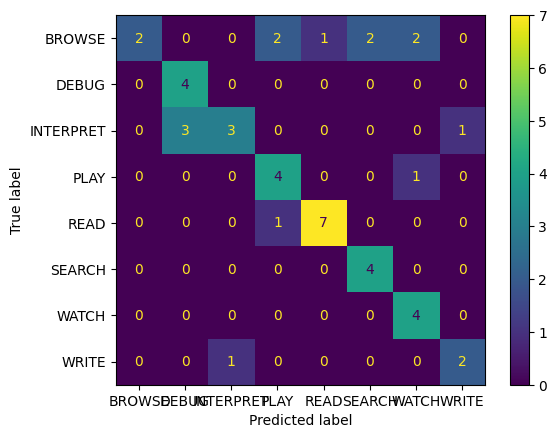

In [145]:
data = dfFeatures01.copy().drop(columns=['set','participant'])
#data['activity'] = np.where(data['activity']== 'WATCH', 1, 0)
classifieur_Pipeline_taux_dataTrain(data, percentTrain=0.8)